In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.2
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

Warning message:
"package 'dplyr' was built under R version 4.0.3"
Warning message:
"package 'forcats' was built under R version 4.0.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
df = read.csv("../scio_clean_3.csv")

In [3]:
target = "DXA_densidad"
bin_target = paste(target, "bin", sep="_")

df2 = df %>%
    drop_na() %>%
    group_by(folio) %>%
    summarise(
        !!target := first(get(target)),
        Peso = first(Peso),
        edad = first(edad),
        BMI = first(Indice.de.Masa.Corporal),
        copa_sosten = first(copa_sosten),
        across(starts_with("spectrum"), mean), 
        across(starts_with("sample_raw"), mean)
    ) %>%
    mutate(
        !!bin_target := ifelse(get(target) > quantile(get(target), 0.75), "high_density", "low_density"),
        BMI_segment = case_when(
            BMI < quantile(BMI, 0.25) ~ "BMI_1_Quartil",
            BMI < quantile(BMI, 0.5) ~ "BMI_2_Quartil",
            BMI < quantile(BMI, 0.75) ~ "BMI_3_Quartil",
            TRUE ~ "BMI_4_Quartil"
        ),
        peso_segment = case_when(
            Peso < quantile(Peso, 0.25) ~ "peso_1_Quartil",
            Peso < quantile(Peso, 0.5) ~ "peso_2_Quartil",
            Peso < quantile(Peso, 0.75) ~ "peso_3_Quartil",
            TRUE ~ "peso_4_Quartil"
        )
    )

`summarise()` ungrouping output (override with `.groups` argument)



`summarise()` regrouping output by 'freq', 'BMI_segment' (override with `.groups` argument)



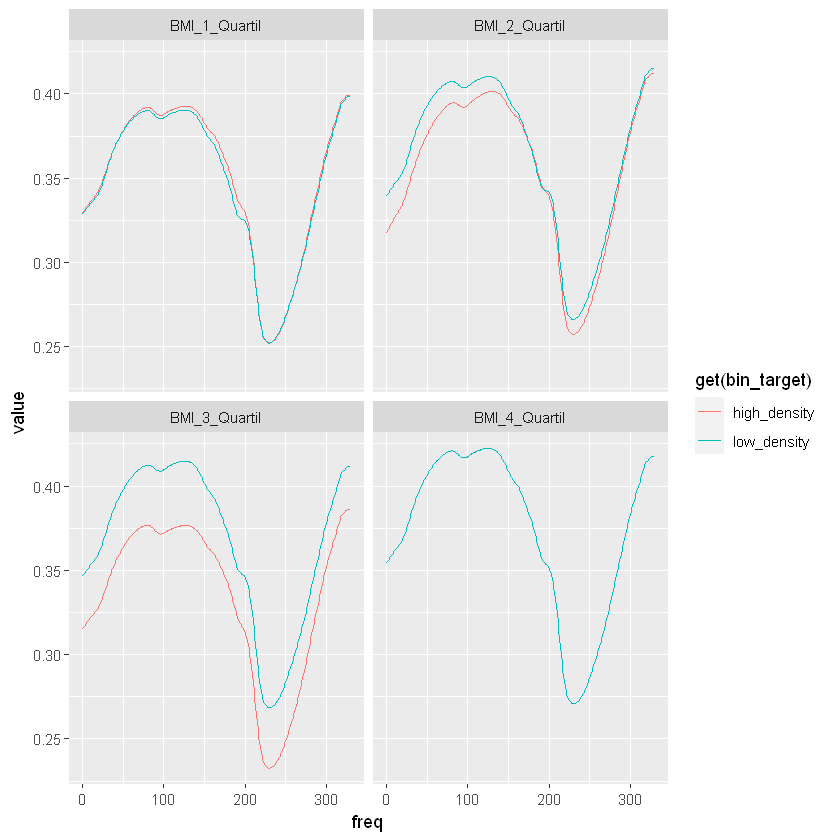

In [25]:
df2 %>%
    filter(
        spectrum_0 < 0.5
    ) %>%
    select(- c(target, BMI, Peso)) %>%
    pivot_longer(
        cols = !c(!!bin_target, BMI_segment, folio, copa_sosten, peso_segment, edad), 
        names_to = "series",
        values_to = "value",
        values_drop_na = TRUE
    ) %>%
    mutate(
        serie = str_replace(series, "_.*", ""),
        freq = as.numeric(str_replace(series, ".*_", ""))
    ) %>%
    filter(serie == 'spectrum') %>%
    ungroup() %>%
    group_by(.dots = bin_target, freq, BMI_segment) %>%
    summarize(value = mean(value)) %>%
    ungroup()  %>%
    ggplot(aes(
        x = freq, 
        y = value, 
        color = get(bin_target),
#         group = folio
        )
    ) +
    geom_line() +
    facet_wrap(~ BMI_segment)
        

`summarise()` regrouping output by 'freq' (override with `.groups` argument)



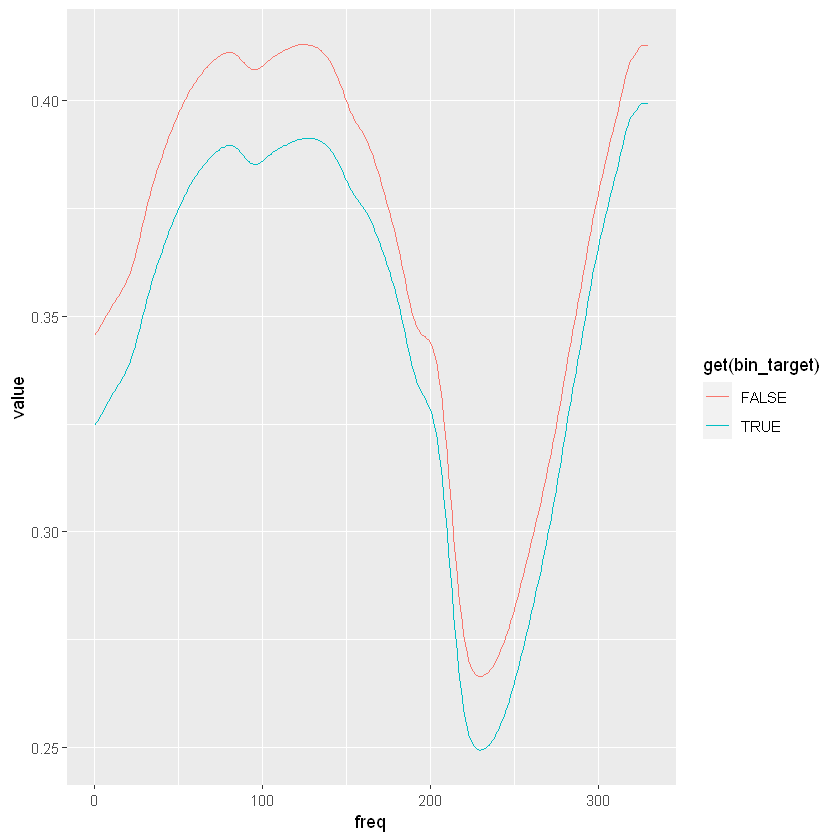

In [153]:
df2 %>%
    filter(
        spectrum_0 < 0.5 &
        (get(target) > quantile(get(target), 0.75) | 
        get(target) < quantile(get(target), 0.75))
    ) %>%
    select(- target) %>%
    pivot_longer(
        cols = !c(!!bin_target, folio), 
        names_to = "series",
        values_to = "value",
        values_drop_na = TRUE
    ) %>%
    mutate(
        serie = str_replace(series, "_.*", ""),
        freq = as.numeric(str_replace(series, ".*_", ""))
    ) %>%
    filter(serie == 'spectrum') %>%
    ungroup() %>%
    group_by(.dots = bin_target, freq) %>%
    summarize(value = mean(value)) %>%
    ungroup()  %>%
    ggplot(aes(
        x = freq, 
        y = value, 
        color = get(bin_target)
        )
    ) +
    geom_line()
           

`summarise()` regrouping output by 'freq_group', 'folio' (override with `.groups` argument)



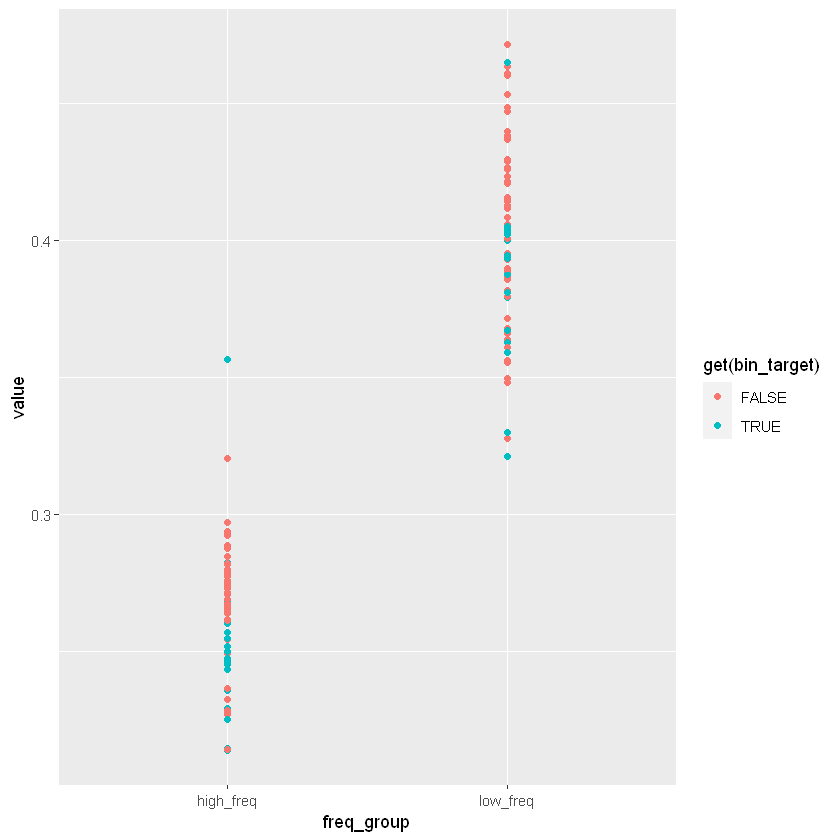

In [164]:
df2 %>%
    filter(
        spectrum_0 < 0.5 &
        (get(target) > quantile(get(target), 0.75) | 
        get(target) < quantile(get(target), 0.75))
    ) %>%
    select(- target) %>%
    pivot_longer(
        cols = !c(!!bin_target, folio), 
        names_to = "series",
        values_to = "value",
        values_drop_na = TRUE
    ) %>%
    mutate(
        serie = str_replace(series, "_.*", ""),
        freq = as.numeric(str_replace(series, ".*_", ""))
    ) %>%
    filter(
        serie == 'spectrum',
        freq %in% c(50:150, 220:230)
    ) %>%
    ungroup() %>%
    mutate(freq_group = ifelse(freq %in% 50:150, "low_freq", "high_freq")) %>%
    group_by(.dots = bin_target, freq_group, folio) %>%
    summarize(value = mean(value)) %>%
    ungroup() %>%
    ggplot(aes(
        x = freq_group,
        y = value,
        color = get(bin_target),
        group = folio
        )
    ) +
        geom_point()
        

In [12]:
target = "DXA_densidad"
bin_target = paste(target, "bin", sep="_")

df2 = df %>%
    drop_na() %>%
    group_by(folio) %>%
    summarise(
        !!target := first(get(target)),
        Peso = first(Peso),
        edad = first(edad),
        BMI = first(Indice.de.Masa.Corporal),
        copa_sosten = first(copa_sosten),
        across(starts_with("spectrum"), mean), 
        across(starts_with("sample_raw"), mean)
    ) %>%
    mutate(
        !!bin_target := ifelse(get(target) > quantile(get(target), 0.75), "high_density", "low_density"),
        BMI_segment = case_when(
            BMI < 18 ~ "<18",
            BMI < 25 ~ "18-25",
            BMI < 30 ~ "25-30",
            TRUE ~ ">30"
        ),
        peso_segment = case_when(
            Peso < quantile(Peso, 0.25) ~ "peso_1_Quartil",
            Peso < quantile(Peso, 0.5) ~ "peso_2_Quartil",
            Peso < quantile(Peso, 0.75) ~ "peso_3_Quartil",
            TRUE ~ "peso_4_Quartil"
        )
    )

`summarise()` ungrouping output (override with `.groups` argument)



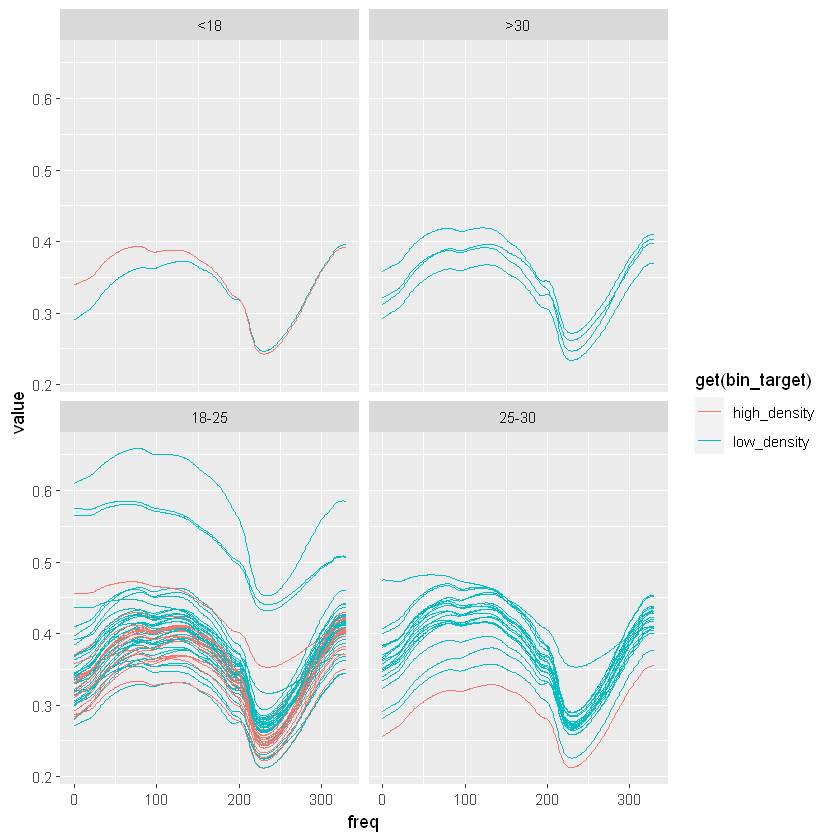

In [13]:
df2 %>%
    filter(
        get(target) > quantile(get(target), 0.75) | 
        get(target) < quantile(get(target), 0.75)
    ) %>%
    select(- c(target, BMI, Peso)) %>%
    pivot_longer(
        cols = !c(!!bin_target, BMI_segment, folio, copa_sosten, peso_segment, edad), 
        names_to = "series",
        values_to = "value",
        values_drop_na = TRUE
    ) %>%
    mutate(
        serie = str_replace(series, "_.*", ""),
        freq = as.numeric(str_replace(series, ".*_", ""))
    ) %>%
    filter(serie == 'spectrum') %>%
    ungroup() %>%
#     group_by(.dots = bin_target, freq, BMI_segment) %>%
#     summarize(value = mean(value)) %>%
#     ungroup()  %>%
    ggplot(aes(
        x = freq, 
        y = value, 
        color = get(bin_target),
        group = folio
        )
    ) +
    geom_line() +
    facet_wrap(~ BMI_segment)

`summarise()` regrouping output by 'freq', 'BMI_segment' (override with `.groups` argument)



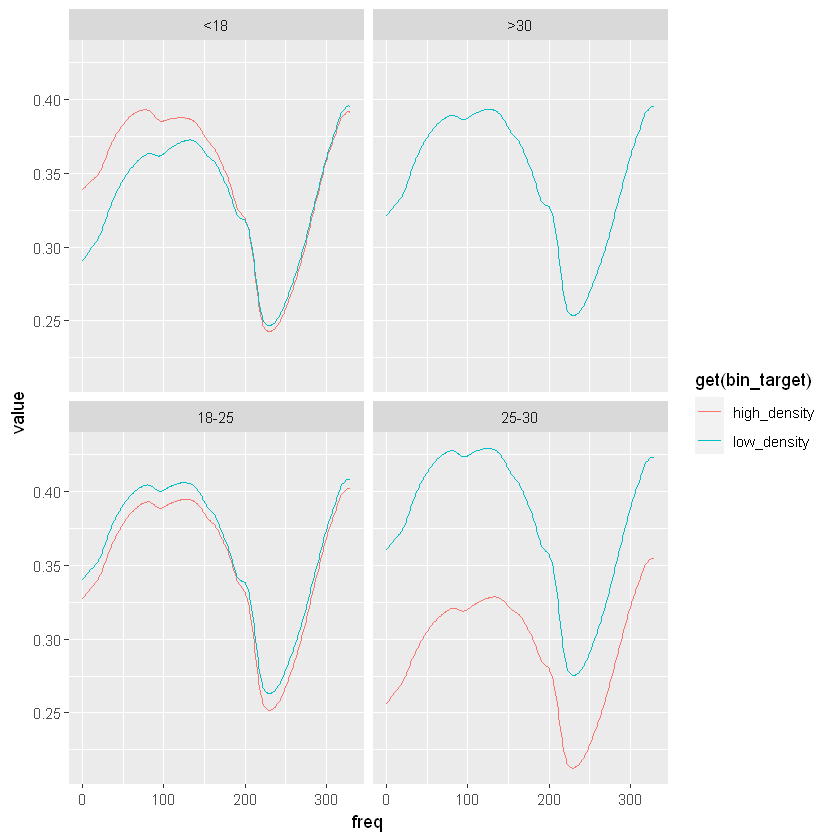

In [21]:
df2 %>%
    filter(
        spectrum_1 < 0.5
    ) %>%
    select(- c(target, BMI, Peso)) %>%
    pivot_longer(
        cols = !c(!!bin_target, BMI_segment, folio, copa_sosten, peso_segment, edad), 
        names_to = "series",
        values_to = "value",
        values_drop_na = TRUE
    ) %>%
    mutate(
        serie = str_replace(series, "_.*", ""),
        freq = as.numeric(str_replace(series, ".*_", ""))
    ) %>%
    filter(serie == 'spectrum') %>%
    ungroup() %>%
    group_by(.dots = bin_target, freq, BMI_segment) %>%
    summarize(value = mean(value)) %>%
    ungroup()  %>%
    ggplot(aes(
        x = freq, 
        y = value, 
        color = get(bin_target),
#         group = folio
        )
    ) +
    geom_line() +
    facet_wrap(~ BMI_segment)

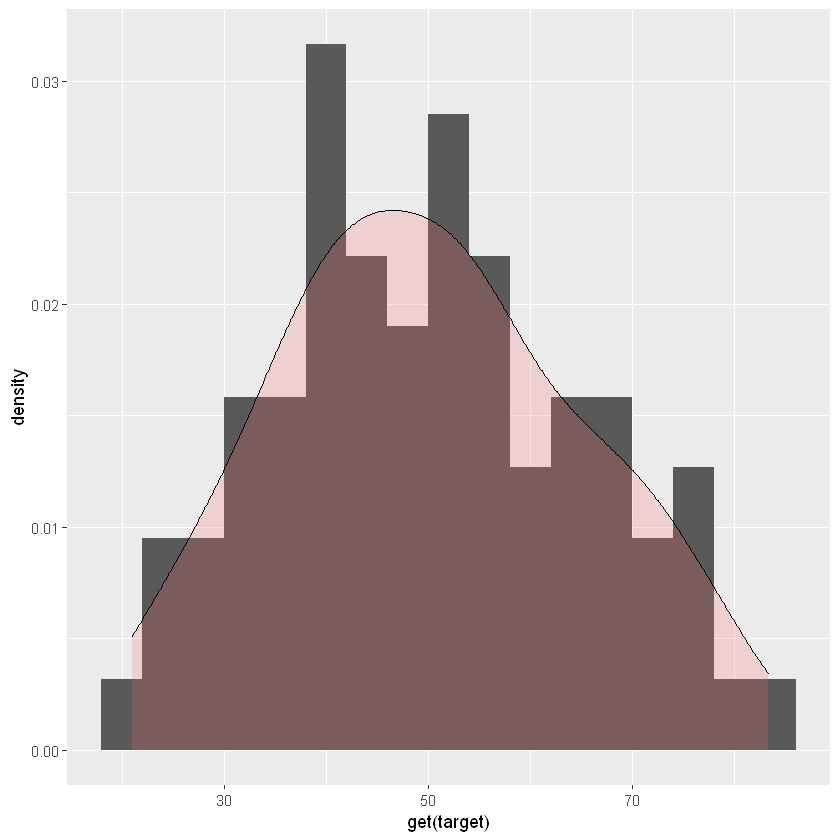

In [40]:
df2 %>%
    ggplot(aes(x = get(target))) +
    geom_histogram(aes(y=..density..), binwidth=4)+
    geom_density(alpha=.2, fill="#FF6666") 

In [6]:
nrow(df2)

[1] 79